In [60]:
# 2P7 - Vector Calculus and PDEs
## Examples Paper 1

In [ ]:
We first import some modules that we will need. You may not be familiar with "mplot3d" - this enables us to do a 3D plot.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib 

Using matplotlib backend: nbAgg


In [ ]:
*myfield* - a function which returns the components of the B vector at the coordinates supplied as arguments.

In [57]:
def myfield( x, y, z ):
    
    field_definition = 0 # this is a switch variable for when you have more than one field option
    
    if field_definition == 0: # this is the field from Q6(i)
        Bx = -y
        By = z
        Bz = 0
        
    #elif field_definition == 1:   # put your new field here
        # Bx = ...
        # By = ...
        # Bz = ...
    
    
    # to allow for if x,y,z are arrays, but Bx, By or Bz is a constant
    if (np.size(Bx) == 1):
        Bx = Bx * np.ones( np.size(x) )
    if (np.size(By) == 1):
        By = By * np.ones( np.size(y) )
    if (np.size(Bz) == 1):
        Bz = Bz * np.ones( np.size(z) )
        
    return Bx, By, Bz

In [ ]:
*myfieldline* - a function to return arrays of coordinates of a field line. 
The start coordinates and total length of the field line are arguments.
This function calls *myfield*.

In [58]:
def myfieldline( x0, y0, z0, distance ):
    
    N = 100
    ds = float(distance) / N
    
    X = np.zeros(N)
    Y = np.zeros(N)
    Z = np.zeros(N)
    
    X[0] = x0
    Y[0] = y0
    Z[0] = z0
    
    for i in range(1,N):
        [Bx,By,Bz] = myfield( X[i-1], Y[i-1], Z[i-1] ) # Evaluate the field at the previous point (i-1)
        # Normalise the vector:
        magnitude = np.sqrt( Bx**2 + By**2 + Bz**2 )
        Bnx = Bx / magnitude
        Bny = By / magnitude
        Bnz = Bz / magnitude
        # Now evaluate the field line location at the current point (i)
        X[i] = X[i-1] + Bnx*ds
        Y[i] = Y[i-1] + Bny*ds
        Z[i] = Z[i-1] + Bnz*ds
    
    return X, Y, Z

In [ ]:
The main part of our script plots the field lines

<IPython.core.display.Javascript object>


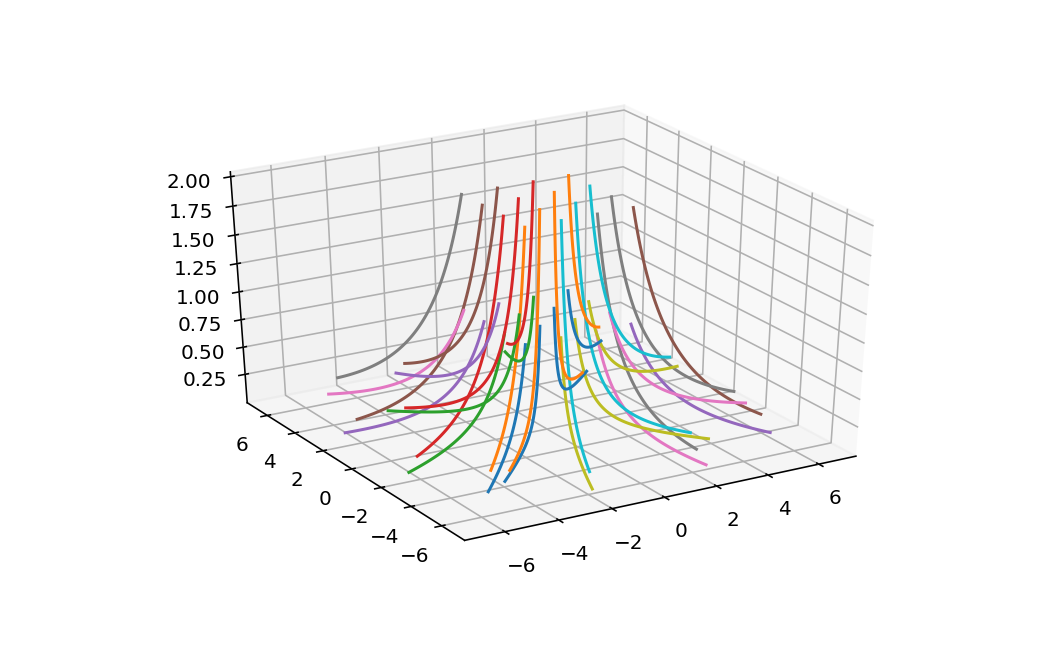

In [59]:
x_range = np.linspace(-2,2,4)
y_range = np.linspace(-2,2,4)
z_range = np.linspace(1,2,2)

fig = plt.figure()
ax = fig.gca(projection='3d')

for x0 in x_range:
    for y0 in y_range:
        for z0 in z_range:
            [X,Y,Z] = myfieldline( x0, y0, z0, 5)
            ax.plot(X,Y,Z)
            
plt.show()
